# Data Reading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.style.use('ggplot')

In [2]:
ratings = pd.read_csv('../data/ml-100k/u.data', sep='\t', names=['user_id', 'movie_id', 'rating'],usecols=range(3))
movies = pd.read_csv('../data/ml-100k/u.item', sep='|', names=['movie_id', 'title', 'release_date','url'], usecols=[0,1,2,4],encoding='latin-1')
moviesRated = pd.merge(movies, ratings)

,movie_id,title,release_date,url,user_id,rating
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4
1,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,287,5
2,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,148,4
3,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,280,4
4,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,66,3
5,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,5,4
6,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,109,4
7,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,181,3
8,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,95,5
9,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,268,3


# General Feature Analysis

## I. What are the release dates like for the movies?

In [66]:
movies['release_year'] = movies['release_date'].str[-4:]
movies['year'] = movies.release_year.apply(pd.to_numeric)
labels_year=['1920-1929','1930-1939','1940-1949','1950-1959','1960-1969','1970-1979','1980-1989','1990-1999','2000-2009']
movies['year_group'] = pd.cut(movies['year'], range(1920,2011,10),labels=labels_year,right=False)

,movie_id,title,release_date,release_year,year_group
0,1,Toy Story (1995),01-Jan-1995,1995,1990-1999
1,2,GoldenEye (1995),01-Jan-1995,1995,1990-1999
2,3,Four Rooms (1995),01-Jan-1995,1995,1990-1999
3,4,Get Shorty (1995),01-Jan-1995,1995,1990-1999
4,5,Copycat (1995),01-Jan-1995,1995,1990-1999
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,1995,1990-1999
6,7,Twelve Monkeys (1995),01-Jan-1995,1995,1990-1999
7,8,Babe (1995),01-Jan-1995,1995,1990-1999
8,9,Dead Man Walking (1995),01-Jan-1995,1995,1990-1999
9,10,Richard III (1995),22-Jan-1996,1996,1990-1999


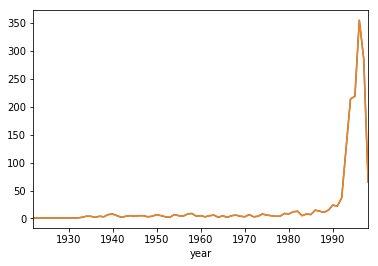

In [72]:
movies.groupby('year').size().plot()
plt.show()

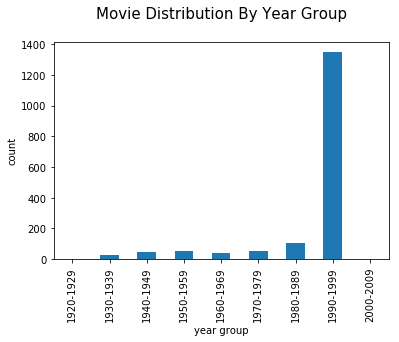

In [73]:
ax = movies.groupby('year_group').size().plot(kind='bar')
ax.set_title('Movie Distribution By Year Group\n',fontsize=15)
ax.set_xlabel('year group')
ax.set_ylabel('count')
fig = ax.get_figure()
plt.show()
fig.savefig('../pics/01MovieDistributionByYearGroup.png', dpi=100)

#### The majority of the movies were released between the year 1990 and 1999.

## II. What are the 5 MOST RATED movies?

In [55]:
movies_mostRated = moviesRated.groupby('title').size().sort_values(ascending=False)[:5]
#movies_mostRated = lens.title.value_counts()
print('The 5 most rated movies :')
movies_mostRated.to_frame().rename(columns={0:'count'}).reset_index()

The 5 most rated movies :


,title,count
0,Star Wars (1977),583
1,Contact (1997),509
2,Fargo (1996),508
3,Return of the Jedi (1983),507
4,Liar Liar (1997),485


In [8]:
from IPython.display import Image
from IPython.display import display

import requests
import json

headers = {'Accept': 'application/json'}
payload = {'api_key': '80a8e6640745646dbd228d24d962e9fa'} 
response = requests.get("http://api.themoviedb.org/3/configuration", params=payload, headers=headers)
response = json.loads(response.text)
base_url = response['images']['base_url'] + 'w185'

def get_poster(imdb_url, base_url):
    # Get IMDB movie ID
    response = requests.get(imdb_url)
    movie_id = response.url.split('/')[-2]
    
    # Query themoviedb.org API for movie poster path.
    movie_url = 'http://api.themoviedb.org/3/movie/{:}/images'.format(movie_id)
    headers = {'Accept': 'application/json'}
    payload = {'api_key': '80a8e6640745646dbd228d24d962e9fa'} 
    response = requests.get(movie_url, params=payload, headers=headers)
    try:
        file_path = json.loads(response.text)['posters'][0]['file_path']
    except:
        # IMDB movie ID is sometimes no good. Need to get correct one.
        movie_title = imdb_url.split('?')[-1].split('(')[0]
        payload['query'] = movie_title
        response = requests.get('http://api.themoviedb.org/3/search/movie', params=payload, headers=headers)
        movie_id = json.loads(response.text)['results'][0]['id']
        payload.pop('query', None)
        movie_url = 'http://api.themoviedb.org/3/movie/{:}/images'.format(movie_id)
        response = requests.get(movie_url, params=payload, headers=headers)
        file_path = json.loads(response.text)['posters'][0]['file_path']
        
    return base_url + file_path

In [9]:
titles_mostRated = movies_mostRated.index
urls_mostRated = []
for title in titles_mostRated:
    url = movies[movies['title'] == title]['url'].values[0]
    urls_mostRated.append(url)

In [10]:
print('The 5 most rated movies:')
posters = tuple(Image(url=get_poster(u, base_url)) for u in urls_mostRated)
display(*posters)

The 5 most rated movies:


## III. What are the 5 MOST HIGHLY RATED movies?

In [54]:
#Apply aggregate functions to multiple columns and have custom names for those columns
movies_meanRatings = moviesRated.groupby('title').agg({'rating': {'ratings count':np.size, 'avg. ratings':np.mean}})
#Only look at 'qualified' movies that have been rated at least 150 times
movies_qualified = movies_meanRatings['rating']['ratings count'] >= 150
movies_highlyRated = movies_meanRatings[movies_qualified].sort_values([('rating', 'avg. ratings')], ascending=False)
#To avoid nested column headings, drop the outermost level from the hierarchical column index 
movies_highlyRated.columns = movies_highlyRated.columns.droplevel(0)
movies_highlyRated = movies_highlyRated[:5]
movies_highlyRated.reset_index()

,title,avg. ratings,ratings count
0,Schindler's List (1993),4.466443,298
1,Casablanca (1942),4.456790,243
2,"Shawshank Redemption, The (1994)",4.445230,283
3,Rear Window (1954),4.387560,209
4,"Usual Suspects, The (1995)",4.385768,267


In [12]:
titles_highlyRated = movies_highlyRated.index
urls_highlyRated = []
for title in titles_highlyRated:
    url = movies[movies['title'] == title]['url'].values[0]
    urls_highlyRated.append(url)

In [13]:
print('The 5 most highly rated movies:')
posters = (Image(url=get_poster(u, base_url)) for u in urls_highlyRated)
display(*posters)

The 5 most highly rated movies:
